# How to use widget in Jupyter Notebook 

## What are widgets ?

In computer software, widgets are the elements of the Graphical User Interfaces (GUIs). For exmaple, a slider to choice the value of the number or simply a textbox to show the information.

## Widgets in the Jupyter Notebook

The widgets libary can be imported into Jupyter notebook as: <br>
```python
import ipywidgets as widgets
```
<font color='red'>ipywidgets</font> is the Python library. 


In [4]:
import ipywidgets as widgets

## Create a slider with integer number

The initial value was set to zero. The range of this integer slider is from -10 to 10.

In [5]:
widgets.IntSlider(value=0, min=-10, max=10)

IntSlider(value=0, max=10, min=-10)

## The widgets can be exported as a variable and display by the <font color='red'>display</font> function. 


In [6]:
w = widgets.IntSlider(value=0, min=-10, max=10)
display(w)

IntSlider(value=0, max=10, min=-10)

## close the widget by:

In [7]:
w.close()

## Link different widgets

The values of different widgets can be linked by the link or jslink function. For exmaple, we can show the value
of the slider into a texbox. 

In [8]:
a = widgets.FloatSlider()
b = widgets.FloatText()
display(a, b)

mylink = widgets.link((a,'value'), (b,'value'))

FloatSlider(value=0.0)

FloatText(value=0.0)

unlink the widgets by <font color='red'>.unlink</font>

In [9]:
mylink.unlink()
display(a,b)

FloatSlider(value=0.0)

FloatText(value=0.0)

## Widgets list

There are many widgets offered by the ipywidgets library, which has different GUIs and functions.
For instance, numeric widgets, boolean widgets, selection widgets and string widgets. Here, I will
briefly introduce these widgets. 


## Numeric widgets

The numeric widgets are desgined to display numeric values. 

### A slider to show range in float numbers

In [10]:
widgets.FloatRangeSlider(
    value=[2, 7],
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

FloatRangeSlider(value=(2.0, 7.0), continuous_update=False, description='Test:', max=10.0, readout_format='.1f…

### A progress bar to display from zero to 100%

In [11]:
import time 


w = widgets.IntProgress(
    value=0,
    min=0,
    max=100,
    step=1,
    description='Loading:',
    bar_style='success',
    orientation='horizontal'
)

display(w)
x = 0

while x <= 100:
    w.value += 1
    time.sleep(0.1)
    x +=1


IntProgress(value=0, bar_style='success', description='Loading:')

## Boolean widgets

Boolean widgets are designed to show boolean values. 

### ToggleButton

In [12]:
widgets.ToggleButton(
    value=False,
    description='Click me',
    disabled=False,
    button_style='danger', 
    tooltip='Description',
    icon='check'
)


ToggleButton(value=False, button_style='danger', description='Click me', icon='check', tooltip='Description')

## Selection widgets 

Selection widgets can be used to select single or multiple values. 

### Multiple values can be selected by the shift key

In [13]:
widgets.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    #rows=10,
    description='Fruits',
    disabled=False
)

SelectMultiple(description='Fruits', index=(1,), options=('Apples', 'Oranges', 'Pears'), value=('Oranges',))

## String widgets

String widgets are used to display string values. 

### Textarea to show some text

In [14]:
widgets.Textarea(
    value='Hello the world!',
    placeholder='Type something',
    description='String:',
    disabled=False
)

Textarea(value='Hello the world!', description='String:', placeholder='Type something')

## Other widgets 

There are many other widgets. For instance, color picker widget, file upload widget and etc. 
One can find all the information at:

[Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/index.html)

## Layout of widgets

In many cases, one need to arrange several widgets together for the tasks. The ipywidgets library 
also provides functions to order the layout of the widgets. 

### Arrange four buttons into a 2x2 grid

In [15]:
from ipywidgets import Button, Layout, jslink, IntText, IntSlider
from ipywidgets import TwoByTwoLayout

def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

top_left_button = create_expanded_button("Top left", 'info')
top_right_button = create_expanded_button("Top right", 'success')
bottom_left_button = create_expanded_button("Bottom left", 'danger')
bottom_right_button = create_expanded_button("Bottom right", 'warning')

TwoByTwoLayout(top_left=top_left_button,
               top_right=top_right_button,
               bottom_left=bottom_left_button,
               bottom_right=bottom_right_button)

TwoByTwoLayout(children=(Button(button_style='info', description='Top left', layout=Layout(grid_area='top-left…

### Create a application-like widget by the AppLayout function

In [16]:
from ipywidgets import AppLayout, Button, Layout

header_button = create_expanded_button('Header', 'success')
left_button = create_expanded_button('Left', 'info')
center_button = create_expanded_button('Center', 'warning')
right_button = create_expanded_button('Right', 'info')
footer_button = create_expanded_button('Footer', 'success')

AppLayout(header=header_button,
          left_sidebar=left_button,
          center=center_button,
          right_sidebar=right_button,
          footer=footer_button)

AppLayout(children=(Button(button_style='success', description='Header', layout=Layout(grid_area='header', hei…

## A example to show the application of the widgets in Jupyter Notebook

## A interactive figure for sine function

<IPython.core.display.Javascript object>


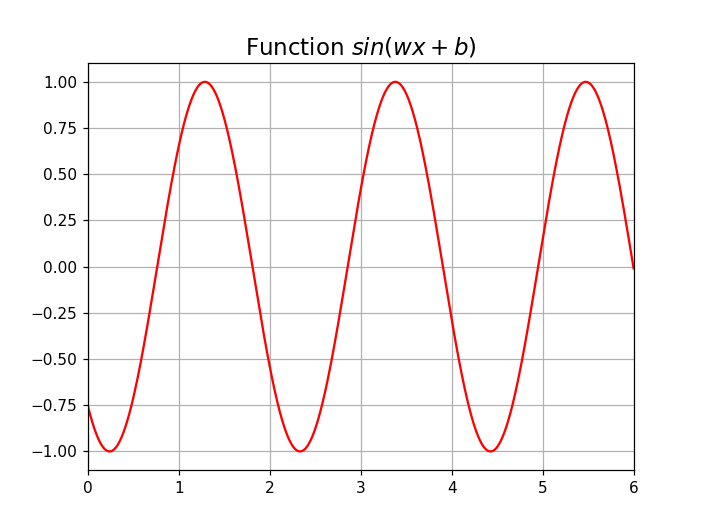

interactive(children=(IntSlider(value=10, description='w', max=10, min=-10), IntSlider(value=0, description='b…

In [18]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntSlider

x = np.linspace(0, 2 * np.pi, 2000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x),'r-')
ax.grid(True)
plt.xlim(0,6)
plt.title(r"Function $sin(wx+b)$", fontsize=15)

def update(w=IntSlider(value=10, min=-10, max=10), b=IntSlider(value=0.0, min=-10, max=10)):
    line.set_ydata(np.sin(w * x + b))
    fig.canvas.draw_idle()

widgets.interact(update);

# Use Binder to visualize the Jupyter notebook on the web

The Binder is a cloud platform, which provide executable environments for the Jupyter notebooks. 
In order to use the Binder, one need to set the repository at GitHub. 

1. In the GitHub repository, some configuration files are needed for the Binder. For instance, the "requirements.txt" file should contain all the required Python libraries. Binder will install the libraries automatically from the _requirements.txt_. In this tutorial, we need numpy, ipywidgets, ipympl and appmode library. Besides, the postBuild file will be executed after the installation of the libraries. Here, we need to enable the widgets for the Jupyter notebook by: 

```console
jupyter labextension install @jupyter-widgets/jupyterlab-manager@0.38
```


2. After setting the GitHub repository, one can simply input the GitHub repository name, git branch name and path to the notebook file at Binder website ([https://mybinder.org](https://mybinder.org)).

In [28]:
file = open("figures/fig_mybinder.png", "rb")
image = file.read()
widgets.Image(
    value=image,
    format='png',
    width=800,
    height=400,
)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xbc\x00\x00\x01\xba\x08\x06\x00\x00\x00+\x85J\x0…

3. The webpage for the Jupyter notebook can be simply presented by opening the URL link in the browser. 

# Appmode

Appemode is a Jupyter extensions, which turns the notebooks into web applications. In another word, the Appemode will hide the python code and only show the markdown and widgets. </br>

One can simply change the "notebook" into "apps" in the Binder URL to open the Jupyter notebook in application model. For example, change _baseurl/notebooks/foo.ipynb_ to _baseurl/apps/foo.ipynb_.

# Jupyter lab

In [32]:
file = open("figures/fig_jupyterlab.png", "rb")
image = file.read()
widgets.Image(
    value=image,
    format='png',
    width=800,
    height=400,
)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\x00\x00\x00\x02\xd0\x08\x03\x00\x00\x00\xf8\xa3-…

JupyterLab is so-called the next-generation web-based GUI for Jupyter, which has much more powerful interface. 

The JupyterLab can be opend by replacing the <font color='red'>_tree</font> at the end of the URL with <font color='red'>_lab</font>.